In [1]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('pritamdeka/S-BioBert-snli-multinli-stsb')

def calculateSemanticSimilarityScore(conceptName, mappedConceptName):
    if mappedConceptName and (mappedConceptName != 'nan'):
        mappedConceptName = str(mappedConceptName)
        if len(mappedConceptName) > 0:
            conceptNameEmbedding = model.encode(conceptName, convert_to_tensor=True)
            mappedConceptNameEmbedding = model.encode(mappedConceptName, convert_to_tensor=True)
            similarityScore = util.pytorch_cos_sim(conceptNameEmbedding, mappedConceptNameEmbedding)
            return similarityScore.item()
    return 0

In [2]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
illnessDf = athenaDf[(athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Condition') & (athenaDf.concept_class_id == 'Clinical Finding')]
illnessDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3289926,4018781,Subarachnoid hemorrhage following injury with ...,Condition,SNOMED,Clinical Finding,NaN,209941001,20020131,20200730,D
3289927,4014661,Subarachnoid hemorrhage following injury with ...,Condition,SNOMED,Clinical Finding,NaN,209943003,20020131,20200730,D
3289928,4014785,Subdural hemorrhage following injury with open...,Condition,SNOMED,Clinical Finding,NaN,209959003,20020131,20200730,D
3289929,4019476,Subdural hemorrhage following injury with open...,Condition,SNOMED,Clinical Finding,NaN,209961007,20020131,20200730,D


In [3]:
import pandas as pd

sourceIllnessDf = pd.read_csv('data/20002_non-cancer_illness.csv', dtype=str)
sourceIllnessDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20002,diabetes,1220,diabetes,NaN,23996,NaN,0.8904300332069397,APPROVED,Vaclav,1604396402676,201820,VALUE,NaN,Vaclav,1604396395977
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,1604397104088,4071876,VALUE,NaN,<auto>,1604359804705
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,1604404677075,4129177,VALUE,NaN,Vaclav,1604404675001
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,1604361691699,256450,VALUE,NaN,<auto>,1604359804727
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,1604361697782,4236898,VALUE,NaN,<auto>,1604359804809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,1604395600509,433527,VALUE,NaN,<auto>,1604359879127
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,1604417223795,374923,VALUE,NaN,<auto>,1604359879335
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,1604395603304,201909,VALUE,NaN,<auto>,1604359879718
444,20002,male infertility,1404,male infertility,NaN,38,NaN,1.0,APPROVED,Vaclav,1604395604447,198197,VALUE,NaN,<auto>,1604359880370


In [4]:
import pandas as pd

mappedIllnessDf = pd.read_csv('data/20002_non-cancer_illness_mapped_majority_voting.csv')
mappedIllnessDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
0,0,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetes mellitus,Low
1,1,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Prediabetes,Low
2,2,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetic neuropathy &/or diabetic polyneuropathy,Low
3,3,fracture hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,High
4,4,uterine problem,Uterine structure,Uterine prolapse,Uterine contractions problem,Uterine structure,Low
...,...,...,...,...,...,...,...
900,900,female infertility,Female infertility,Female infertility,Female infertility,Female infertility,High
901,901,male infertility,Male infertility,Male infertility,Male infertility,Male infertility,High
902,902,other renal/kidney problem,Kidney structure,Peer problem in remission,Ether overdose,Kidney structure,Low
903,903,other renal/kidney problem,Kidney structure,Peer problem in remission,Ether overdose,Peer problem in remission,Low


In [5]:
mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
mappedIllnessMedcatDf.reset_index(drop = True, inplace = True)
mappedIllnessMedcatDf.columns = mappedIllnessMedcatDf.columns.droplevel(1)
mappedIllnessMedcatDf.medcatConcept = mappedIllnessMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedIllnessMedcatDf.searchPhrase = mappedIllnessMedcatDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
mappedIllnessFuzzyDf.reset_index(drop = True, inplace = True)
mappedIllnessFuzzyDf.columns = mappedIllnessFuzzyDf.columns.droplevel(1)
mappedIllnessFuzzyDf.fuzzyConcept = mappedIllnessFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedIllnessFuzzyDf.searchPhrase = mappedIllnessFuzzyDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
mappedIllnessReverseIndexDf.reset_index(drop = True, inplace = True)
mappedIllnessReverseIndexDf.columns = mappedIllnessReverseIndexDf.columns.droplevel(1)
mappedIllnessReverseIndexDf.reverseIndexConcept = mappedIllnessReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedIllnessReverseIndexDf.searchPhrase = mappedIllnessReverseIndexDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessMajorityVotingDf = mappedIllnessDf[mappedIllnessDf.majorityVoting.notna() & mappedIllnessDf.confidence.isin(['Medium', 'High'])].groupby(['searchPhrase'])['searchPhrase', 'majorityVoting'].agg(['unique'])
mappedIllnessMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedIllnessMajorityVotingDf.columns = mappedIllnessMajorityVotingDf.columns.droplevel(1)
mappedIllnessMajorityVotingDf.majorityVoting = mappedIllnessMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedIllnessMajorityVotingDf.searchPhrase = mappedIllnessMajorityVotingDf.searchPhrase.apply(lambda x: str(x[0]))

/tmp/ipykernel_555049/2855382503.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_555049/2855382503.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_555049/2855382503.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
/tmp/ipykernel_555049/28

In [6]:
mappedIllnessCuratedDf = sourceIllnessDf\
    .merge(illnessDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceName', 'sourceValueCode', 'concept_name']]
mappedIllnessCuratedDf = mappedIllnessCuratedDf.rename(columns={'concept_name': 'curatedConcept'})
mappedIllnessCuratedDf

,sourceName,sourceValueCode,curatedConcept
0,diabetes,1220,Diabetes mellitus
1,fracture hand,1638,Fracture of hand
2,uterine problem,1552,Uterus problem
3,asbestosis,1120,Asbestosis
4,haemophilia,1328,Hemophilia
...,...,...,...
441,endometriosis,1402,Endometriosis (clinical)
442,bell's palsy/facial nerve palsy,1250,Bell's palsy
443,female infertility,1403,Female infertility
444,male infertility,1404,Male infertility


In [7]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedIllnessFullDf = mappedIllnessCuratedDf\
    .merge(mappedIllnessMedcatDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
        .merge(mappedIllnessFuzzyDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
            .merge(mappedIllnessReverseIndexDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
                .merge(mappedIllnessMajorityVotingDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])
mappedIllnessFullDf

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,diabetes,1220,Diabetes mellitus,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,NaN
1,fracture hand,1638,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand
2,uterine problem,1552,Uterus problem,Uterine structure,Uterine prolapse,Uterine contractions problem,NaN
3,asbestosis,1120,Asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis
4,haemophilia,1328,Hemophilia,NaN,Hemophilia,Hemophilia,Hemophilia
...,...,...,...,...,...,...,...
441,endometriosis,1402,Endometriosis (clinical),Endometriosis,Endometriosis,Endometriosis,Endometriosis
442,bell's palsy/facial nerve palsy,1250,Bell's palsy,Facial palsy,Bell's palsy &/or facial palsy,Bell's palsy,NaN
443,female infertility,1403,Female infertility,Female infertility,Female infertility,Female infertility,Female infertility
444,male infertility,1404,Male infertility,Male infertility,Male infertility,Male infertility,Male infertility


In [66]:
def getMaxConcept(row):
    sssMedcat = calculateSemanticSimilarityScore(str(row.sourceName), str(row.medcatConcept))
    sssFuzzy = calculateSemanticSimilarityScore(str(row.sourceName), str(row.fuzzyConcept))
    sssReverseIndex = calculateSemanticSimilarityScore(str(row.sourceName), str(row.reverseIndexConcept))
    sssArray = [sssMedcat, sssFuzzy, sssReverseIndex]
    ix = sssArray.index(max(sssArray))
    if ix == 0:
        return row.medcatConcept
    elif ix == 1:
        return row.fuzzyConcept
    elif ix == 2:
        return row.reverseIndexConcept
    else:
        return None


In [73]:
mappedIllnessFullDf.loc[mappedIllnessFullDf.majorityVoting.isna(), 'majorityVoting'] = mappedIllnessFullDf[mappedIllnessFullDf.majorityVoting.isna()].apply(func=getMaxConcept, axis=1)

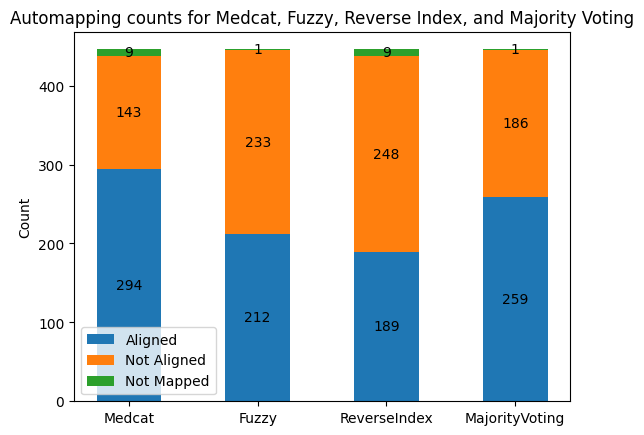

In [83]:
import matplotlib.pyplot as plt


labels = ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
not_mapped = [
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.medcatConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.fuzzyConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.reverseIndexConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.majorityVoting.notna().sum()),
       ]
matching = [
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.medcatConcept].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.fuzzyConcept].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.reverseIndexConcept].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVoting].shape[0],
       ]
not_matching = [
       mappedIllnessFullDf[mappedIllnessFullDf.medcatConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.medcatConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.fuzzyConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.fuzzyConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.reverseIndexConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.reverseIndexConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.majorityVoting.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.majorityVoting)].shape[0],
       ]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(labels, matching, width, label='Aligned')
p2 = ax.bar(labels, not_matching, width, bottom=matching, label='Not Aligned')
p3 = ax.bar(labels, not_mapped, width, bottom=[v + not_matching[i] for i, v in enumerate(matching)], label='Not Mapped')

ax.set_ylabel('Count')
ax.set_title('Automapping counts for Medcat, Fuzzy, Reverse Index, and Majority Voting')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')

plt.show()

In [84]:
mappedIllnessFullDf['semantic_similarity_score_curated'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['curatedConcept'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_medcat'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['medcatConcept'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_fuzzy'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['fuzzyConcept'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_reverse_index'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['reverseIndexConcept'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf['semantic_similarity_score_majority_voting'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['majorityVoting'])) for _, row in mappedIllnessFullDf.iterrows()]
mappedIllnessFullDf

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,semantic_similarity_score_curated,semantic_similarity_score_medcat,semantic_similarity_score_fuzzy,semantic_similarity_score_reverse_index,semantic_similarity_score_majority_voting
0,diabetes,1220,Diabetes mellitus,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetes mellitus,0.798972,0.798972,0.591126,0.614622,0.798972
1,fracture hand,1638,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,0.876594,0.876594,0.876594,0.876594,0.876594
2,uterine problem,1552,Uterus problem,Uterine structure,Uterine prolapse,Uterine contractions problem,Uterine contractions problem,0.902381,0.678367,0.725670,0.828172,0.828172
3,asbestosis,1120,Asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis,0.955248,0.955248,0.955248,0.955248,0.955248
4,haemophilia,1328,Hemophilia,NaN,Hemophilia,Hemophilia,Hemophilia,0.737507,0.000000,0.737507,0.737507,0.737507
...,...,...,...,...,...,...,...,...,...,...,...,...
441,endometriosis,1402,Endometriosis (clinical),Endometriosis,Endometriosis,Endometriosis,Endometriosis,0.891370,0.967853,0.967853,0.967853,0.967853
442,bell's palsy/facial nerve palsy,1250,Bell's palsy,Facial palsy,Bell's palsy &/or facial palsy,Bell's palsy,Bell's palsy &/or facial palsy,0.814919,0.677626,0.825389,0.814919,0.825389
443,female infertility,1403,Female infertility,Female infertility,Female infertility,Female infertility,Female infertility,0.994405,0.994405,0.994405,0.994405,0.994405
444,male infertility,1404,Male infertility,Male infertility,Male infertility,Male infertility,Male infertility,0.991546,0.991546,0.991546,0.991546,0.991546


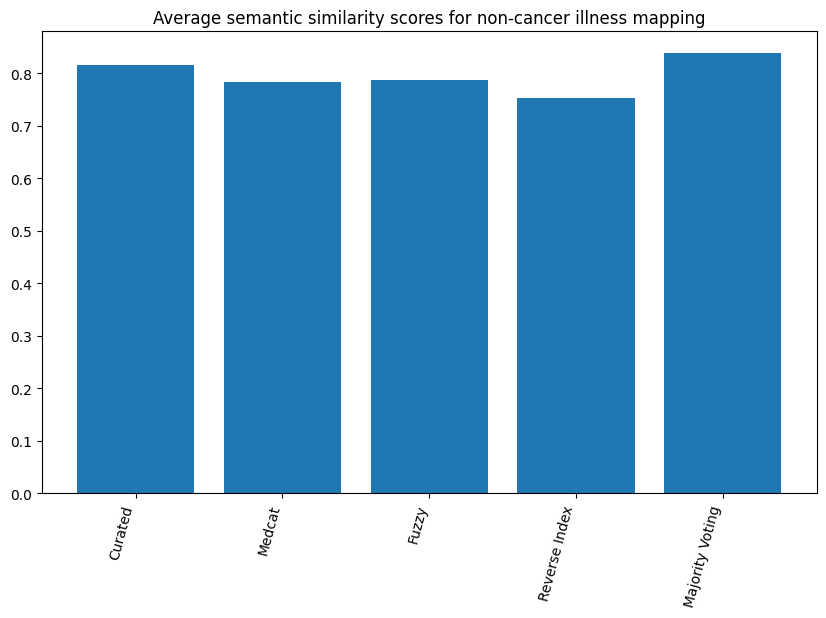

In [86]:
avg_semantic_similarity_score_curated = mappedIllnessFullDf[mappedIllnessFullDf['curatedConcept'].notna()]['semantic_similarity_score_curated'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['curatedConcept'].notna()].shape[0]
avg_semantic_similarity_score_medcat = mappedIllnessFullDf[mappedIllnessFullDf['medcatConcept'].notna()]['semantic_similarity_score_medcat'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['medcatConcept'].notna()].shape[0]
avg_semantic_similarity_score_fuzzy = mappedIllnessFullDf[mappedIllnessFullDf['fuzzyConcept'].notna()]['semantic_similarity_score_fuzzy'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['fuzzyConcept'].notna()].shape[0]
avg_semantic_similarity_score_reverse_index = mappedIllnessFullDf[mappedIllnessFullDf['reverseIndexConcept'].notna()]['semantic_similarity_score_reverse_index'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['reverseIndexConcept'].notna()].shape[0]
avg_semantic_similarity_score_majority_voting = mappedIllnessFullDf[mappedIllnessFullDf['majorityVoting'].notna()]['semantic_similarity_score_majority_voting'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['majorityVoting'].notna()].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Curated', 'Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting'],
    height=[
        avg_semantic_similarity_score_curated, avg_semantic_similarity_score_medcat, avg_semantic_similarity_score_fuzzy, avg_semantic_similarity_score_reverse_index, avg_semantic_similarity_score_majority_voting
        ],
    )
ax.set_title('Average semantic similarity scores for non-cancer illness mapping')
plt.xticks(rotation=75, ha='right')
plt.show()

In [94]:
def getEnsembleConcept(row):
    sssMedcatFuzzy = calculateSemanticSimilarityScore(str(row.medcatConcept), str(row.fuzzyConcept))
    sssMedcatReverseIndex = calculateSemanticSimilarityScore(str(row.medcatConcept), str(row.reverseIndexConcept))
    sssFuzzyReverseIndex = calculateSemanticSimilarityScore(str(row.fuzzyConcept), str(row.reverseIndexConcept))
    sssArray = [sssMedcatFuzzy, sssMedcatReverseIndex, sssFuzzyReverseIndex]
    ix = sssArray.index(max(sssArray))
    if (ix == 0):
        return row.fuzzyConcept
    elif (ix == 1):
        return row.reverseIndexConcept
    elif (ix == 2):
        return row.fuzzyConcept
    else:
        return None


In [96]:
mappedIllnessFullDf['EnsembleConcept'] = mappedIllnessFullDf.apply(func=getEnsembleConcept, axis=1)

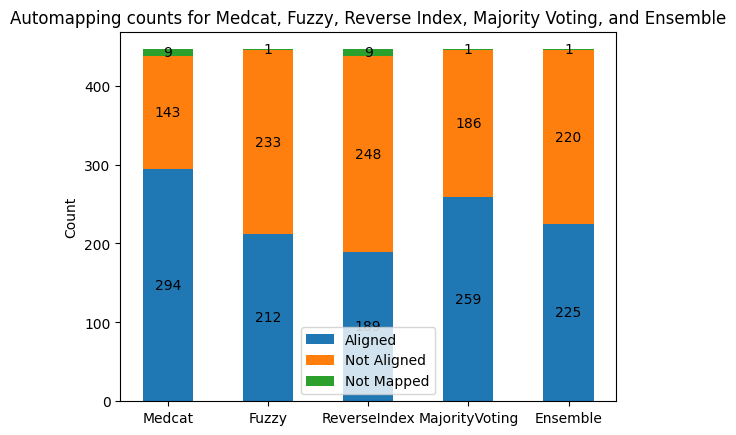

In [98]:
import matplotlib.pyplot as plt


labels = ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting', 'Ensemble']
not_mapped = [
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.medcatConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.fuzzyConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.reverseIndexConcept.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.majorityVoting.notna().sum()),
       (mappedIllnessFullDf.shape[0] - mappedIllnessFullDf.EnsembleConcept.notna().sum()),
       ]
matching = [
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.medcatConcept].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.fuzzyConcept].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.reverseIndexConcept].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.majorityVoting].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.curatedConcept == mappedIllnessFullDf.EnsembleConcept].shape[0],
       ]
not_matching = [
       mappedIllnessFullDf[mappedIllnessFullDf.medcatConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.medcatConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.fuzzyConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.fuzzyConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.reverseIndexConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.reverseIndexConcept)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.majorityVoting.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.majorityVoting)].shape[0],
       mappedIllnessFullDf[mappedIllnessFullDf.EnsembleConcept.notna() & (mappedIllnessFullDf.curatedConcept != mappedIllnessFullDf.EnsembleConcept)].shape[0],
       ]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(labels, matching, width, label='Aligned')
p2 = ax.bar(labels, not_matching, width, bottom=matching, label='Not Aligned')
p3 = ax.bar(labels, not_mapped, width, bottom=[v + not_matching[i] for i, v in enumerate(matching)], label='Not Mapped')

ax.set_ylabel('Count')
ax.set_title('Automapping counts for Medcat, Fuzzy, Reverse Index, Majority Voting, and Ensemble')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')

plt.show()

In [99]:
mappedIllnessFullDf['semantic_similarity_score_ensemble'] = [calculateSemanticSimilarityScore(str(row['sourceName']), str(row['EnsembleConcept'])) for _, row in mappedIllnessFullDf.iterrows()]

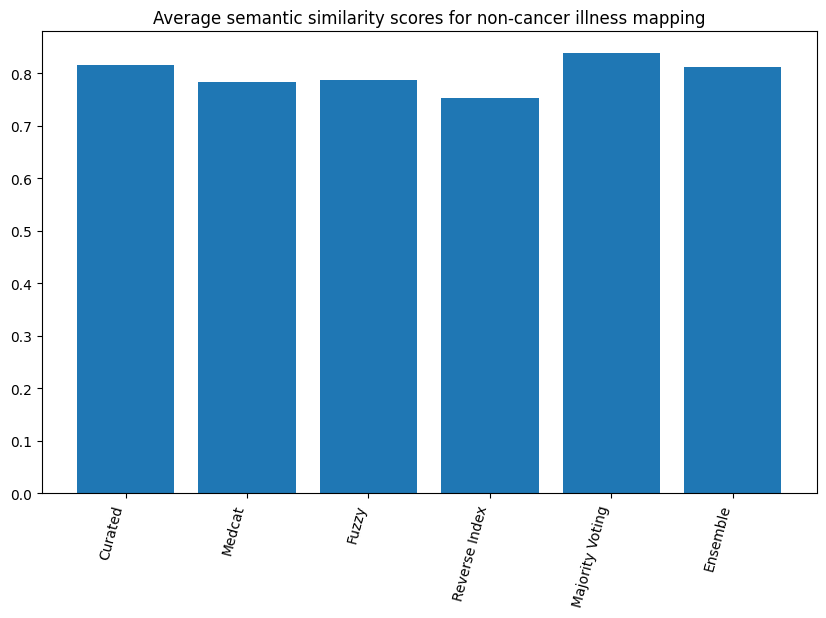

In [102]:
avg_semantic_similarity_score_curated = mappedIllnessFullDf[mappedIllnessFullDf['curatedConcept'].notna()]['semantic_similarity_score_curated'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['curatedConcept'].notna()].shape[0]
avg_semantic_similarity_score_medcat = mappedIllnessFullDf[mappedIllnessFullDf['medcatConcept'].notna()]['semantic_similarity_score_medcat'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['medcatConcept'].notna()].shape[0]
avg_semantic_similarity_score_fuzzy = mappedIllnessFullDf[mappedIllnessFullDf['fuzzyConcept'].notna()]['semantic_similarity_score_fuzzy'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['fuzzyConcept'].notna()].shape[0]
avg_semantic_similarity_score_reverse_index = mappedIllnessFullDf[mappedIllnessFullDf['reverseIndexConcept'].notna()]['semantic_similarity_score_reverse_index'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['reverseIndexConcept'].notna()].shape[0]
avg_semantic_similarity_score_majority_voting = mappedIllnessFullDf[mappedIllnessFullDf['majorityVoting'].notna()]['semantic_similarity_score_majority_voting'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['majorityVoting'].notna()].shape[0]
avg_semantic_similarity_score_ensemble = mappedIllnessFullDf[mappedIllnessFullDf['EnsembleConcept'].notna()]['semantic_similarity_score_ensemble'].sum()/mappedIllnessFullDf[mappedIllnessFullDf['EnsembleConcept'].notna()].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Curated', 'Medcat', 'Fuzzy', 'Reverse Index', 'Majority Voting', 'Ensemble'],
    height=[
        avg_semantic_similarity_score_curated, avg_semantic_similarity_score_medcat, avg_semantic_similarity_score_fuzzy, avg_semantic_similarity_score_reverse_index, avg_semantic_similarity_score_majority_voting, avg_semantic_similarity_score_ensemble
        ],
    )
ax.set_title('Average semantic similarity scores for non-cancer illness mapping')
plt.xticks(rotation=75, ha='right')
plt.show()